# Exercise 1

## a) Web Scraping

Scraping is only legal and ethical if the extracted data is for personal use and analysis. If the results of the collected data were to be published, a request for the permission of the data subjects must be sent beforehand. Also data which is protected by copyright should not be fetched.  
Most websites state on their privacy policy and terms & conditions if web scraping is allowed on their site.

## b) Twitter API
For detailed information see ``twitter_api.py``. The Data was gathered with keyword 'Innsbruck' and hashtag '#Innsbruck'.  
The python script was executed multiple times to fetch more data for the analysis part. Unfortunately, the essential access to the twitter API only allowed 100 tweets per fetch. This resulted in a data set with a lot of duplicates.

## c) Analysis of the data

In [15]:
#imports
import pandas as pd
import json
import matplotlib.pyplot as plt

We need to compute mean, median of *likes*, *replies* and *retweets* from scraped twitter data:

In [16]:
with open("tweets.json") as f:
    tweets_raw = json.load(f)

tweets = pd.json_normalize(tweets_raw)


In [17]:
# drop duplicate id entries+
tweets.drop_duplicates('id', inplace=True)
tweets.describe()

,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count
count,152.000000,152.000000,152.000000,152.000000
mean,39.914474,0.092105,0.559211,0.019737
std,391.856220,0.352010,3.100381,0.139554
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,12.000000,0.000000,0.000000,0.000000
max,4837.000000,2.000000,36.000000,1.000000


In [18]:
like_median = tweets["public_metrics.like_count"].median()
like_mean = tweets["public_metrics.like_count"].mean()
reply_median = tweets["public_metrics.reply_count"].median()
reply_mean = tweets["public_metrics.reply_count"].mean()
retweet_median = tweets["public_metrics.retweet_count"].median()
retweet_mean = tweets["public_metrics.retweet_count"].mean()
print(f"Median of likes: {like_median}")
print(f"Mean of likes: {like_mean}")
print(f"Median of replies: {reply_median}")
print(f"Mean of replies: {reply_mean}")
print(f"Median of retweets: {retweet_median}")
print(f"Mean of retweets: {retweet_mean}")


Median of likes: 0.0
Mean of likes: 0.5592105263157895
Median of replies: 0.0
Mean of replies: 0.09210526315789473
Median of retweets: 0.0
Mean of retweets: 39.91447368421053


We can see that the *retweets* are an outlier compared to the other two statistics, since the mean is 58.0289... Since the median is 0 like for the other stats, this implies that there must be some tweets which have many retweets in order to skew the mean.

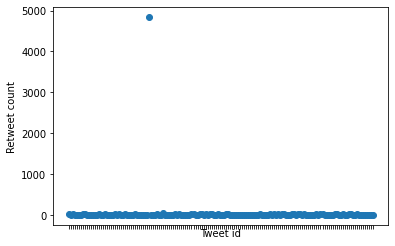

In [19]:
fig, ax = plt.subplots()
ax.scatter(tweets["id"],tweets["public_metrics.retweet_count"])
ax.set_xlabel("Tweet id")
ax.set_ylabel("Retweet count")
for label in ax.xaxis.get_ticklabels():
    label.set_visible(False) # hide id labels since they are not relevant
fig.show()

The plot above confirms this theory! We have a single tweet with almost 5000 retweets which skews our mean.